In [12]:
import pandas as pd
df=pd.read_csv('/home/adish/Downloads/income.txt')
df.columns=['name','age','income($)']
df.to_csv('/home/adish/Desktop/income_kmeans.csv')


In [10]:
df1=pd.read_csv('/home/adish/Desktop/income_kmeans.csv')
df1.drop(['Unnamed: 0'],axis=1)

,name,age,income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler#
from matplotlib import pyplot as plt
%matplotlib inline

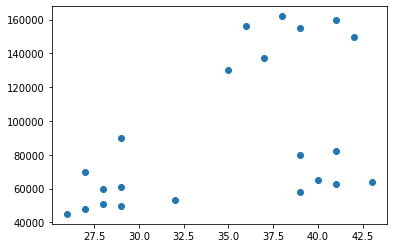

In [19]:
plt.scatter(df1['age'],df1['income($)'])

In [20]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
y_pred=km.fit_predict(df1[['age','income($)']])#eliminate 'name'column which is a string,which donot have anything to do with clustering
y_pred
#it ran kmeans algo on age and income
#and created 3 clusters(0,1,2)

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [23]:
df1['clusters']=y_pred
df1

,Unnamed: 0,name,age,income($),clusters
0,0,Rob,27,70000,0
1,1,Michael,29,90000,0
2,2,Mohan,29,61000,2
3,3,Ismail,28,60000,2
4,4,Kory,42,150000,1
5,5,Gautam,39,155000,1
6,6,David,41,160000,1
7,7,Andrea,38,162000,1
8,8,Brad,36,156000,1
9,9,Angelina,35,130000,1


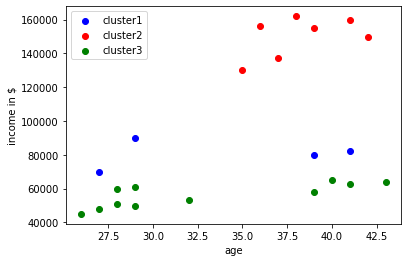

In [28]:
dfc1=df1[df1.clusters==0]
dfc2=df1[df1.clusters==1]
dfc3=df1[df1.clusters==2]

plt.scatter(dfc1['age'],dfc1['income($)'],color='blue',label='cluster1')
plt.scatter(dfc2['age'],dfc2['income($)'],color='red',label='cluster2')
plt.scatter(dfc3['age'],dfc3['income($)'],color='green',label='cluster3')

plt.xlabel('age')
plt.ylabel('income in $')
plt.legend()

### Here cluster 1 is not clustered correctly,bcoz of scaling issues...y axis in range of 10,000's where as x axis is in range of 10's

### Feature scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
It is performed during the data pre-processing to handle highly varying magnitudes or values or units. 
If feature scaling is not done, then a machine learning algorithm tends to weigh greater values,
higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using feature scaling method then it can consider 
the value 3000 meter to be greater than 5 km but that’s actually not true and in this case,
the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to 
same magnitudes and thus, tackle this issue.

### Min-Max Normalization: 

This technique re-scales a feature or observation value with distribution value between 0 and 1.

x_new=(xi -min(x))/(max(x)-min(x))

In [35]:
#feature scaling using minmaxscaler
scaler=MinMaxScaler()
df1['income($)']=scaler.fit_transform(df1[['income($)']])
df1

,name,age,income($),clusters
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [36]:
#feature scaling using minmaxscaler
scaler=MinMaxScaler()
df1['age']=scaler.fit_transform(df1[['age']])
df1

,name,age,income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [37]:
#applying kmeans algorithm to scaled dataset
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df1[['age','income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [38]:
df1['new_cluster_based_on_scaling']=y_pred
df1

,name,age,income($),clusters,new_cluster_based_on_scaling
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,0
3,Ismail,0.117647,0.128205,2,0
4,Kory,0.941176,0.897436,1,1
5,Gautam,0.764706,0.940171,1,1
6,David,0.882353,0.982906,1,1
7,Andrea,0.705882,1.000000,1,1
8,Brad,0.588235,0.948718,1,1
9,Angelina,0.529412,0.726496,1,1


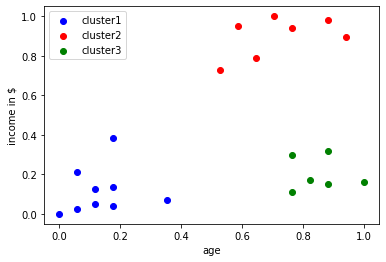

In [43]:
#plotting after doing feature scaling

dfc1=df1[df1.new_cluster_based_on_scaling==0]
dfc2=df1[df1.new_cluster_based_on_scaling==1]
dfc3=df1[df1.new_cluster_based_on_scaling==2]

plt.scatter(dfc1['age'],dfc1['income($)'],color='blue',label='cluster1')
plt.scatter(dfc2['age'],dfc2['income($)'],color='red',label='cluster2')
plt.scatter(dfc3['age'],dfc3['income($)'],color='green',label='cluster3')

plt.xlabel('age')
plt.ylabel('income in $')
plt.legend()

In [40]:
#print centroids of the clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [42]:
#centroid for cluster1=(0.1372549 , 0.11633428)
#centroid for cluster2=(0.72268908, 0.8974359)
#centroid for cluster3=(0.85294118, 0.2022792)

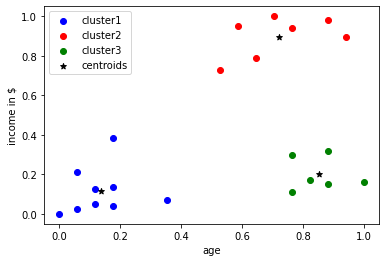

In [52]:
#plotting centroids along with clusters 

dfc1=df1[df1.new_cluster_based_on_scaling==0]
dfc2=df1[df1.new_cluster_based_on_scaling==1]
dfc3=df1[df1.new_cluster_based_on_scaling==2]

plt.scatter(dfc1['age'],dfc1['income($)'],color='blue',label='cluster1')
plt.scatter(dfc2['age'],dfc2['income($)'],color='red',label='cluster2')
plt.scatter(dfc3['age'],dfc3['income($)'],color='green',label='cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroids')
plt.xlabel('age')
plt.ylabel('income in $')
plt.legend()

### ELBOW technique

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. 

The Elbow Method is one of the most popular methods to determine this optimal value of k.

### Distortion: 
It is calculated as squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

SSE(Sum of Squared Errors)

sum of squared error for cluster1, SSE1=sigma(i=0 to n) distance(xi-c1)^2

xi-->each datapoint in cluster1
c1-->centroid of cluster1
distance-->distance between each datapoint and cluster centroid

SSE_TOTAL=SSE1+SSE2+...+SSEK

SSE_TOTAL for k=1..then follow same procedure to find SSE for k=2...

Then plot SSE vs k

as you increase number of clusters, you can see that the error(SSE) also decreases,

### using elbow technique,find an elbow in the plot between SSE and number of clusters(k)..that elbow point will determine the best number of clusters for your dataset.

K-->number of clusters


### Inertia:
It is the sum of squared distances of samples to their closest cluster center.

In [55]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1[['age','income($)']])
    km.inertia_#inertia_ gives sse value for each k
    sse.append(km.inertia_)


In [56]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.2766936276300278,
 0.22020960864009392,
 0.1768104413388771,
 0.1376250414652804,
 0.10497488680620905]

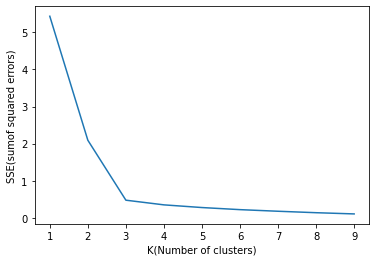

In [58]:
#plotting sse vs k(number of clusters)
plt.xlabel('K(Number of clusters)')
plt.ylabel('SSE(sumof squared errors)')
plt.plot(k_range,sse)


### above plot shows an elbow at 3..which means 3 is the best number of clusters you can have in your dataset

In [59]:
pwd

'/home/adish/Downloads'